- EDA
- Feature Engineering
- Preprocessing
- Modeling

- `id`: идентификатор записи;
- `url`: URL записи о продаже;
- `region`: регион;
- `region_url`: URL региона;
- `price`: стоимость;
- `year`: год выпуска;
- `manufacturer`: производитель;
- `model`: модель;
- `condition`: состояние;
- `cylinders`: количество цилиндров;
- `fuel`: тип топлива;
- `odometer`: количество пройденных миль;
- `title_status`: статус;
- `transmission`: коробка передач;
- `VIN`: идентификационный номер;
- `drive`: тип привода;
- `size`: размер;
- `type`: кузов;
- `paint_color`: цвет;
- `image_url`: URL изображения;
- `description`: указанное описание;
- `county`: страна;
- `state`: штат;
- `lat`: широта;
- `long`: долгота;
- `posting_date`: дата размещения объявления о продаже;
- `price_category`: категория цены.

In [486]:
# 0
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from matplotlib import pyplot

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error
from sklearn.model_selection import train_test_split 
from sklearn.neural_network import MLPClassifier


In [368]:
# 1
data_set = pd.read_csv("data/df_out.csv")

In [369]:
data_set.head(2)

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00


## Exploratory data analysis

### Data Preparation

In [370]:
df = data_set

In [371]:
df.shape

(10000, 20)

In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  int64  
 1   url             10000 non-null  object 
 2   region          10000 non-null  object 
 3   region_url      10000 non-null  object 
 4   price           10000 non-null  int64  
 5   year            9964 non-null   float64
 6   manufacturer    10000 non-null  object 
 7   model           9872 non-null   object 
 8   fuel            9937 non-null   object 
 9   odometer        10000 non-null  int64  
 10  title_status    9834 non-null   object 
 11  transmission    9955 non-null   object 
 12  image_url       9998 non-null   object 
 13  description     9998 non-null   object 
 14  state           10000 non-null  object 
 15  lat             9902 non-null   float64
 16  long            9902 non-null   float64
 17  posting_date    9998 non-null   

In [373]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'fuel', 'odometer', 'title_status', 'transmission',
       'image_url', 'description', 'state', 'lat', 'long', 'posting_date',
       'price_category', 'date'],
      dtype='object')

In [374]:
def print_useful_rows_info(data):
    print('Количество полностью заполненных объектов из выборки:', len(data.dropna()))
    print('Процент полностью заполненных объектов из выборки:', round(len(data.dropna()) / len(data) * 100, 2))

In [375]:
print_useful_rows_info(df)

Количество полностью заполненных объектов из выборки: 9507
Процент полностью заполненных объектов из выборки: 95.07


In [376]:
pd.DataFrame(data = [df.isna().sum()/df.shape[0]*100],
             index=["values Null (%)"]).T.style.background_gradient(cmap='summer_r')

,values Null (%)
id,0.000000
url,0.000000
region,0.000000
region_url,0.000000
price,0.000000
year,0.360000
manufacturer,0.000000
model,1.280000
fuel,0.630000
odometer,0.000000


### Data Cleaning

In [377]:
df[df.year.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
344,7304102133,https://wenatchee.craigslist.org/ctd/d/wenatch...,wenatchee,https://wenatchee.craigslist.org,35880,NaN,other,500,gas,13508,clean,automatic,https://images.craigslist.org/00J0J_6IMoEUzIIM...,2019 *Ram* *1500* Big Horn/Lone Star 4x2 Quad ...,wa,47.434493,-120.320759,2021-04-09T06:31:03-0700,high,2021-04-09 13:31:03+00:00
420,7316337069,https://lasvegas.craigslist.org/ctd/d/scottsda...,las vegas,https://lasvegas.craigslist.org,84995,NaN,other,Super Duty F-350 SRW,diesel,1268,clean,automatic,https://images.craigslist.org/00x0x_iQCC0Ef28S...,2020 *Ford* *Super Duty F-350 SRW* 1K MILES. B...,nv,33.458277,-111.925970,2021-05-03T11:31:39-0700,high,2021-05-03 18:31:39+00:00
425,7315662117,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,43900,NaN,other,Grand Caravan,NaN,21,clean,automatic,https://images.craigslist.org/00f0f_7AwipNocNH...,"2019 *Dodge* *Grand Caravan* SE - $43,900Call ...",co,39.674406,-104.998604,2021-05-02T01:11:33-0600,high,2021-05-02 07:11:33+00:00
702,7316199009,https://nashville.craigslist.org/ctd/d/nashvil...,nashville,https://nashville.craigslist.org,28498,NaN,other,olet Silverado 1500,NaN,59246,NaN,automatic,https://images.craigslist.org/00T0T_dZ7nOXskCS...,2019 *Chevrolet* *Silverado 1500* 2019 CHEVROL...,tn,36.138022,-86.732261,2021-05-03T10:00:40-0500,high,2021-05-03 15:00:40+00:00
893,7316840794,https://denver.craigslist.org/ctd/d/american-f...,denver,https://denver.craigslist.org,60900,NaN,other,F-150,gas,6110,clean,automatic,https://images.craigslist.org/01616_bpzSdSRTbx...,"2020 *Ford* *F-150* PLATINUM FX4 Truck - $60,9...",co,40.362248,-111.785947,2021-05-04T12:11:22-0600,high,2021-05-04 18:11:22+00:00
906,7311915616,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,67900,NaN,other,Odyssey,gas,21,clean,automatic,https://images.craigslist.org/00404_erlbeKWEkn...,2020 *Honda* *Odyssey* EX-L w/Navi/RES Automat...,co,39.674406,-104.998604,2021-04-24T10:41:06-0600,high,2021-04-24 16:41:06+00:00
1005,7306735187,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,38900,NaN,other,Grand Caravan,NaN,21,clean,automatic,https://images.craigslist.org/00F0F_3T6FM0XMZW...,"2019 *Dodge* *Grand Caravan* SE - $38,900Call ...",co,39.674406,-104.998604,2021-04-14T10:51:36-0600,high,2021-04-14 16:51:36+00:00
1217,7309954650,https://gainesville.craigslist.org/ctd/d/gaine...,gainesville,https://gainesville.craigslist.org,24975,NaN,other,CR-V,gas,44128,clean,automatic,https://images.craigslist.org/00000_2TUtAgLlCR...,"2019 *Honda* *CR-V* EX 2WD SUV - $24,975Call o...",fl,29.676827,-82.319202,2021-04-20T14:46:55-0400,high,2021-04-20 18:46:55+00:00
1319,7313865045,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,47900,NaN,other,a Sienna,gas,43701,clean,automatic,https://images.craigslist.org/00o0o_8XYp4Zygdj...,2018 *Toyota* *Sienna* LE Automatic Access Sea...,co,39.674406,-104.998604,2021-04-28T10:12:14-0600,high,2021-04-28 16:12:14+00:00
1845,7303344554,https://daytona.craigslist.org/ctd/d/new-smyrn...,daytona beach,https://daytona.craigslist.org,35850,NaN,other,Transit Cargo Van,gas,567,clean,automatic,https://images.craigslist.org/00a0a_d4XVrHnlxl...,"2020 *Ford* *Transit Cargo Van* T-250 148"" WB*...",fl,29.046240,-80.934561,2021-04-07T17:10:06-0400,high,2021-04-07 21:10:06+00:00


In [378]:
df = df[df.year.notna()]

In [379]:
df[df.model.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
67,7316913641,https://ventura.craigslist.org/cto/d/camarillo...,ventura county,https://ventura.craigslist.org,3000,2005.0,rover,NaN,gas,165206,clean,automatic,https://images.craigslist.org/00S0S_b3yx6L4N2S...,2005 Range Rover HSE Changed Oil and now engi...,ca,34.219565,-119.001986,2021-05-04T13:11:15-0700,low,2021-05-04 20:11:15+00:00
142,7316550853,https://chicago.craigslist.org/chc/cto/d/midlo...,chicago,https://chicago.craigslist.org,3000,2006.0,jeep,NaN,gas,132000,clean,automatic,https://images.craigslist.org/01111_kNv3EKjH4H...,SUPER CLEAN 2006 JEEP LIBEERY RANAGADE 4X4 O...,il,41.618957,-87.726334,2021-05-03T20:33:40-0500,low,2021-05-04 01:33:40+00:00
151,7303575863,https://worcester.craigslist.org/ctd/d/fitchbu...,worcester / central MA,https://worcester.craigslist.org,7800,2007.0,gmc,NaN,gas,190000,clean,automatic,https://images.craigslist.org/00f0f_iWjiToqea2...,2007 gmc with plow leather loaded nice truck r...,ma,42.579600,-71.803100,2021-04-08T09:10:07-0400,low,2021-04-08 13:10:07+00:00
200,7315267860,https://gainesville.craigslist.org/ctd/d/kissi...,gainesville,https://gainesville.craigslist.org,19200,2012.0,ram,NaN,gas,121371,clean,automatic,https://images.craigslist.org/00W0W_hHV4D0Po0G...,2012 RAM 1500 Laramie Crew Cab 2WD Offered...,fl,28.329026,-81.404237,2021-05-01T10:05:17-0400,medium,2021-05-01 14:05:17+00:00
251,7316024407,https://reading.craigslist.org/ctd/d/paterson-...,reading,https://reading.craigslist.org,18695,2007.0,ram,NaN,diesel,220019,clean,automatic,https://images.craigslist.org/00n0n_jgq4eOvH7I...,2007 Dodge Ram 2500 SLT 4x4 Quad Cab Cummins D...,pa,40.894535,-74.152367,2021-05-02T21:06:09-0400,medium,2021-05-03 01:06:09+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9564,7314341390,https://desmoines.craigslist.org/cto/d/urbanda...,des moines,https://desmoines.craigslist.org,8000,2007.0,toyota,NaN,gas,85285,clean,automatic,https://images.craigslist.org/00K0K_aMoJgOIueB...,Toyota has been owned by non smoker with no pe...,ia,41.629500,-93.723000,2021-04-29T10:50:54-0500,low,2021-04-29 15:50:54+00:00
9616,7304358131,https://vermont.craigslist.org/ctd/d/salem-201...,vermont,https://vermont.craigslist.org,19944,2012.0,ram,NaN,gas,73082,clean,automatic,https://images.craigslist.org/00A0A_bfCaGJ20IX...,2012 RAM 1500 4WD REGULAR CAB SHORT BED 5.7 HE...,vt,42.788204,-71.233728,2021-04-09T16:24:23-0400,medium,2021-04-09 20:24:23+00:00
9670,7309686008,https://louisville.craigslist.org/cto/d/radcli...,louisville,https://louisville.craigslist.org,1600,2005.0,gmc,NaN,gas,52536,clean,automatic,https://images.craigslist.org/01111_99unV6cYER...,GMC Savana PRO AWD cargo van has been driven l...,ky,37.858900,-86.006900,2021-04-20T04:48:30-0400,low,2021-04-20 08:48:30+00:00
9926,7316447901,https://tulsa.craigslist.org/cto/d/tulsa-2017-...,tulsa,https://tulsa.craigslist.org,65000,2017.0,rover,NaN,gas,47000,clean,automatic,https://images.craigslist.org/00s0s_iGpmplDL99...,"2017 Range Rover HSE, supercharged V8, silver ...",ok,36.126200,-95.940800,2021-05-03T16:37:36-0500,high,2021-05-03 21:37:36+00:00


In [380]:
df.model = df.model.fillna('other')

/tmp/ipykernel_11144/2869405376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.model = df.model.fillna('other')


In [381]:
df.fuel = df.fuel.fillna('other')

/tmp/ipykernel_11144/340757909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fuel = df.fuel.fillna('other')


In [382]:
df[df.title_status.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
11,7316540706,https://cincinnati.craigslist.org/ctd/d/fairfi...,cincinnati,https://cincinnati.craigslist.org,4995,2012.0,fiat,500 pop,gas,59242,NaN,manual,https://images.craigslist.org/00Z0Z_jbUmVcYlwR...,"2012 Fiat 500 Pop FOR ONLY $102/mo!59,242 mi. ...",oh,39.297045,-84.563243,2021-05-03T21:03:32-0400,low,2021-05-04 01:03:32+00:00
187,7313570594,https://orangecounty.craigslist.org/ctd/d/coro...,orange county,https://orangecounty.craigslist.org,17900,2013.0,ram,1500 tradesman quad cab,gas,145499,NaN,automatic,https://images.craigslist.org/00H0H_1JFMPCYyW8...,2013 Ram 1500 Tradesman Quad Cab PRICED TO SEL...,ca,33.873436,-117.542806,2021-04-27T15:03:47-0700,medium,2021-04-27 22:03:47+00:00
245,7315211652,https://ocala.craigslist.org/ctd/d/riverview-2...,ocala,https://ocala.craigslist.org,40990,2019.0,toyota,sienna xle,gas,3700,NaN,automatic,https://images.craigslist.org/01111_grKNF8GrXz...,2019 Toyota Sienna - Wheelchair Accessible Han...,fl,27.849760,-82.364950,2021-05-01T06:35:56-0400,high,2021-05-01 10:35:56+00:00
286,7306702976,https://toledo.craigslist.org/ctd/d/chelsea-73...,toledo,https://toledo.craigslist.org,4592,2003.0,chevrolet,avalanche 1500,gas,268691,NaN,automatic,https://images.craigslist.org/00808_1IOMJuA4GL...,$73/mo - 2003 Chevrolet Avalanche 1500 BaseCre...,oh,42.300673,-84.024108,2021-04-14T12:03:01-0400,low,2021-04-14 16:03:01+00:00
312,7307609203,https://roseburg.craigslist.org/ctd/d/eugene-2...,roseburg,https://roseburg.craigslist.org,18450,2017.0,ford,mustang,gas,66049,NaN,automatic,https://images.craigslist.org/00505_4apF36sLbP...,"2017 Ford MUSTANG - $18,450 \tMayberry Motors ...",or,44.058499,-123.106176,2021-04-16T04:06:29-0700,medium,2021-04-16 11:06:29+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9740,7301707830,https://tricities.craigslist.org/ctd/d/bristol...,tri-cities,https://tricities.craigslist.org,8995,2013.0,honda,odyssey,gas,203112,NaN,automatic,https://images.craigslist.org/00u0u_bawW7HN8xW...,"2013 *Honda* *Odyssey* 5dr EX Van FWD - $8,995...",tn,36.541821,-82.234645,2021-04-04T13:12:27-0400,low,2021-04-04 17:12:27+00:00
9805,7313949726,https://harrisburg.craigslist.org/ctd/d/brockp...,harrisburg,https://harrisburg.craigslist.org,8900,2012.0,honda,accord,other,95674,NaN,NaN,https://images.craigslist.org/01212_dsfYRNhxfd...,Car Starz Call Sales at 717-401-4221 2012 Hond...,pa,41.261540,-78.704520,2021-04-28T14:25:32-0400,low,2021-04-28 18:25:32+00:00
9840,7314987181,https://nashville.craigslist.org/ctd/d/nashvil...,nashville,https://nashville.craigslist.org,20900,2014.0,lexus,rx 350,gas,70800,NaN,automatic,https://images.craigslist.org/00Q0Q_cGablAkoYV...,2014 *Lexus* *RX 350* 2014 LEXUS RX 350 SUV 1-...,tn,36.138022,-86.732261,2021-04-30T15:00:48-0500,medium,2021-04-30 20:00:48+00:00
9856,7309717260,https://savannah.craigslist.org/ctd/d/jacksonv...,savannah / hinesville,https://savannah.craigslist.org,11495,2006.0,lexus,gx 470,gas,242000,NaN,automatic,https://images.craigslist.org/00s0s_8xg4gw6aAg...,"2006 *Lexus* *GX 470* 4dr SUV 4WD - $11,495By ...",ga,30.513566,-81.621875,2021-04-20T08:01:49-0400,medium,2021-04-20 12:01:49+00:00


In [383]:
#Пробовал сделать так, все ровно выдает придупреждение .loc
#df.loc[df.title_status.isna()] = df.title_status.mode

In [384]:
df.title_status = df.title_status.fillna(df.title_status.mode)

/tmp/ipykernel_11144/473790399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.title_status = df.title_status.fillna(df.title_status.mode)


In [385]:
df[df.transmission.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
111,7305109580,https://grandrapids.craigslist.org/ctd/d/comst...,grand rapids,https://grandrapids.craigslist.org,12750,2013.0,lexus,es,gas,109382,clean,NaN,https://images.craigslist.org/00n0n_kACT1l7OCN...,2013 Lexus ES 350 4dr Sdn Offered by: Auto...,mi,43.059210,-85.688970,2021-04-11T09:41:58-0400,medium,2021-04-11 13:41:58+00:00
112,7314951119,https://southjersey.craigslist.org/ctd/d/chest...,south jersey,https://southjersey.craigslist.org,18199,2012.0,jeep,wrangler,other,130174,clean,NaN,https://images.craigslist.org/00I0I_gRmuXmqil1...,2012 Jeep Wrangler Unlimited Sport 4WD Off...,nj,40.135190,-74.703570,2021-04-30T14:58:56-0400,medium,2021-04-30 18:58:56+00:00
817,7308021604,https://southjersey.craigslist.org/ctd/d/maple...,south jersey,https://southjersey.craigslist.org,11999,2015.0,honda,civic,gas,79797,clean,NaN,https://images.craigslist.org/00b0b_aCqgRZ7sAx...,2015 Honda Civic EX Offered by: VIP Auto O...,nj,39.938023,-74.971461,2021-04-16T19:46:55-0400,medium,2021-04-16 23:46:55+00:00
931,7314781483,https://nh.craigslist.org/ctd/d/plaistow-2018-...,new hampshire,https://nh.craigslist.org,64990,2018.0,ram,3500,other,8853,clean,NaN,https://images.craigslist.org/00000_iHpXs2BVmN...,2018 RAM Ram Chassis 3500 Short Wheelbase (Dua...,nh,42.834977,-71.107791,2021-04-30T10:15:30-0400,high,2021-04-30 14:15:30+00:00
970,7315044723,https://poconos.craigslist.org/ctd/d/chesterfi...,poconos,https://poconos.craigslist.org,22699,2014.0,jeep,wrangler,gas,110493,clean,NaN,https://images.craigslist.org/00M0M_aFDXWIfug9...,2014 Jeep Wrangler Unlimited Sport 4WD Off...,pa,40.135190,-74.703570,2021-04-30T17:46:04-0400,high,2021-04-30 21:46:04+00:00
1156,7311083008,https://greenville.craigslist.org/ctd/d/greenv...,greenville / upstate,https://greenville.craigslist.org,9998,2013.0,volkswagen,jetta,diesel,96115,clean,NaN,https://images.craigslist.org/00F0F_9oq0KNmZIM...,2013 VOLKSWAGEN JETTA TDI Highline Offered...,sc,34.832550,-82.368350,2021-04-22T17:55:57-0400,medium,2021-04-22 21:55:57+00:00
1349,7303942891,https://wenatchee.craigslist.org/ctd/d/everett...,wenatchee,https://wenatchee.craigslist.org,4995,2005.0,honda,pilot,gas,261591,clean,NaN,https://images.craigslist.org/00S0S_aASnH27HDH...,2005 Honda Pilot EX Offered by: Corn Motor...,wa,47.912956,-122.235725,2021-04-08T16:52:48-0700,low,2021-04-08 23:52:48+00:00
1715,7310344536,https://roanoke.craigslist.org/ctd/d/roanoke-2...,roanoke,https://roanoke.craigslist.org,3995,2007.0,ford,mustang,gas,159342,clean,NaN,https://images.craigslist.org/00J0J_6BuTyEWqNQ...,2007 Ford Mustang V6 Deluxe Coupe Offered ...,va,37.335355,-79.859385,2021-04-21T11:30:46-0400,low,2021-04-21 15:30:46+00:00
1914,7307857568,https://fortmyers.craigslist.org/lee/ctd/d/for...,ft myers / SW florida,https://fortmyers.craigslist.org,17000,2012.0,jeep,grand cherokee,gas,116079,clean,NaN,https://images.craigslist.org/00000_gqxck1dkEu...,2012 Jeep Grand Cherokee Limited Offered b...,fl,26.498960,-81.819380,2021-04-16T14:46:41-0400,medium,2021-04-16 18:46:41+00:00
2023,7314592581,https://pueblo.craigslist.org/ctd/d/pueblo-200...,pueblo,https://pueblo.craigslist.org,8494,2004.0,ford,ranger,gas,156969,clean,NaN,https://images.craigslist.org/01212_6ixSUy4WCq...,2004 Ford Ranger Offered by: Discount Moto...,co,38.298339,-104.616024,2021-04-29T17:30:13-0600,low,2021-04-29 23:30:13+00:00


In [386]:
df.transmission.value_counts(dropna=False)

automatic    7667
other        1623
manual        631
NaN            43
Name: transmission, dtype: int64

In [387]:
df.transmission = df.transmission.fillna('other')

/tmp/ipykernel_11144/4107010891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.transmission = df.transmission.fillna('other')


In [388]:
df[df.lat.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
118,7312692841,https://tricities.craigslist.org/ctd/d/bmw-ser...,tri-cities,https://tricities.craigslist.org,17998,2012.0,bmw,5 series,gas,62665,clean,automatic,https://images.craigslist.org/00909_57Xyuj8AJH...,2012 BMW 5 Series 535i M Sport Heat & Cool Sea...,tn,NaN,NaN,2021-04-26T04:28:35-0400,medium,2021-04-26 08:28:35+00:00
126,7315526339,https://newjersey.craigslist.org/ctd/d/look-wh...,north jersey,https://newjersey.craigslist.org,22995,2014.0,bmw,7 series,gas,81085,clean,automatic,https://images.craigslist.org/00k0k_38TNTakyUf...,2014 BMW 7 Series 4dr Sdn 750Li xDrive AWD Aut...,nj,NaN,NaN,2021-05-01T17:49:09-0400,high,2021-05-01 21:49:09+00:00
502,7308641593,https://winstonsalem.craigslist.org/ctd/d/ford...,winston-salem,https://winstonsalem.craigslist.org,20998,2016.0,ford,transit cargo,gas,123825,clean,automatic,https://images.craigslist.org/00101_gwJT4WBNRo...,2016 Ford Transit Cargo Vans Work Van High Roo...,nc,NaN,NaN,2021-04-18T04:43:46-0400,medium,2021-04-18 08:43:46+00:00
567,7309282242,https://onslow.craigslist.org/ctd/d/mercedes-b...,jacksonville,https://onslow.craigslist.org,10810,2014.0,mercedes-benz,c-class,gas,124476,clean,automatic,https://images.craigslist.org/01414_6jNHxQwrKx...,2014 Mercedes Benz C Class C 250 Sport Coupe C...,nc,NaN,NaN,2021-04-19T12:06:28-0400,medium,2021-04-19 16:06:28+00:00
692,7314847134,https://atlanta.craigslist.org/atl/ctd/d/2008-...,atlanta,https://atlanta.craigslist.org,17900,2008.0,toyota,tundra,gas,96000,clean,automatic,https://images.craigslist.org/01313_6u7l4KgvV4...,Description: 2008 Toyota Tundra 5...,ga,NaN,NaN,2021-04-30T12:09:49-0400,medium,2021-04-30 16:09:49+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9154,7312710592,https://athensga.craigslist.org/ctd/d/bmw-x5-a...,athens,https://athensga.craigslist.org,14975,2013.0,bmw,x5,gas,97195,clean,automatic,https://images.craigslist.org/00i0i_kU6D0X9br2...,2013 BMW X5 xDrive35i Sport Activity Navigatio...,ga,NaN,NaN,2021-04-26T07:31:40-0400,medium,2021-04-26 11:31:40+00:00
9408,7311736404,https://raleigh.craigslist.org/ctd/d/lexus-nx-...,raleigh / durham / CH,https://raleigh.craigslist.org,28998,2018.0,lexus,nx 300,gas,19863,clean,automatic,https://images.craigslist.org/00Q0Q_j7S3aRy6Sw...,2018 Lexus NX 300 Navigation Sunroof Bluetooth...,nc,NaN,NaN,2021-04-24T00:54:33-0400,high,2021-04-24 04:54:33+00:00
9650,7315596665,https://newjersey.craigslist.org/ctd/d/wow-201...,north jersey,https://newjersey.craigslist.org,16495,2013.0,jeep,grand cherokee,other,90878,clean,automatic,https://images.craigslist.org/00v0v_awwo3NjD7Q...,2013 Jeep Grand Cherokee 4WD 4dr Laredo Automa...,nj,NaN,NaN,2021-05-01T20:53:57-0400,medium,2021-05-02 00:53:57+00:00
9668,7308677951,https://myrtlebeach.craigslist.org/ctd/d/ford-...,myrtle beach,https://myrtlebeach.craigslist.org,33647,2015.0,ford,f-250 super duty,diesel,153524,clean,automatic,https://images.craigslist.org/00f0f_1c0aGXmmCL...,2015 Ford F250 4x4 Truck Diesel Pickup Trucks ...,sc,NaN,NaN,2021-04-18T08:43:25-0400,high,2021-04-18 12:43:25+00:00


In [389]:
pd.DataFrame(data = [df.isna().sum()/df.shape[0]*100],
             index=["values Null (%)"]).T.style.background_gradient(cmap='summer_r')

,values Null (%)
id,0.000000
url,0.000000
region,0.000000
region_url,0.000000
price,0.000000
year,0.000000
manufacturer,0.000000
model,0.000000
fuel,0.000000
odometer,0.000000


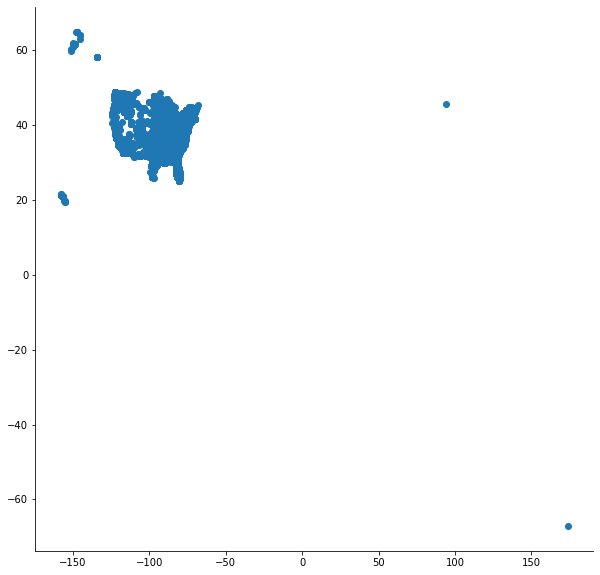

In [390]:
plt.figure(figsize=(10,10))
plt.scatter(df.long, df.lat)
sns.despine()
plt.show()

In [391]:
df[['long', 'lat']] = df[['long', 'lat']].fillna(0)

/tmp/ipykernel_11144/638797112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['long', 'lat']] = df[['long', 'lat']].fillna(0)


In [392]:
df[df['long']== 0.0]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
118,7312692841,https://tricities.craigslist.org/ctd/d/bmw-ser...,tri-cities,https://tricities.craigslist.org,17998,2012.0,bmw,5 series,gas,62665,clean,automatic,https://images.craigslist.org/00909_57Xyuj8AJH...,2012 BMW 5 Series 535i M Sport Heat & Cool Sea...,tn,0.0,0.0,2021-04-26T04:28:35-0400,medium,2021-04-26 08:28:35+00:00
126,7315526339,https://newjersey.craigslist.org/ctd/d/look-wh...,north jersey,https://newjersey.craigslist.org,22995,2014.0,bmw,7 series,gas,81085,clean,automatic,https://images.craigslist.org/00k0k_38TNTakyUf...,2014 BMW 7 Series 4dr Sdn 750Li xDrive AWD Aut...,nj,0.0,0.0,2021-05-01T17:49:09-0400,high,2021-05-01 21:49:09+00:00
502,7308641593,https://winstonsalem.craigslist.org/ctd/d/ford...,winston-salem,https://winstonsalem.craigslist.org,20998,2016.0,ford,transit cargo,gas,123825,clean,automatic,https://images.craigslist.org/00101_gwJT4WBNRo...,2016 Ford Transit Cargo Vans Work Van High Roo...,nc,0.0,0.0,2021-04-18T04:43:46-0400,medium,2021-04-18 08:43:46+00:00
567,7309282242,https://onslow.craigslist.org/ctd/d/mercedes-b...,jacksonville,https://onslow.craigslist.org,10810,2014.0,mercedes-benz,c-class,gas,124476,clean,automatic,https://images.craigslist.org/01414_6jNHxQwrKx...,2014 Mercedes Benz C Class C 250 Sport Coupe C...,nc,0.0,0.0,2021-04-19T12:06:28-0400,medium,2021-04-19 16:06:28+00:00
692,7314847134,https://atlanta.craigslist.org/atl/ctd/d/2008-...,atlanta,https://atlanta.craigslist.org,17900,2008.0,toyota,tundra,gas,96000,clean,automatic,https://images.craigslist.org/01313_6u7l4KgvV4...,Description: 2008 Toyota Tundra 5...,ga,0.0,0.0,2021-04-30T12:09:49-0400,medium,2021-04-30 16:09:49+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9154,7312710592,https://athensga.craigslist.org/ctd/d/bmw-x5-a...,athens,https://athensga.craigslist.org,14975,2013.0,bmw,x5,gas,97195,clean,automatic,https://images.craigslist.org/00i0i_kU6D0X9br2...,2013 BMW X5 xDrive35i Sport Activity Navigatio...,ga,0.0,0.0,2021-04-26T07:31:40-0400,medium,2021-04-26 11:31:40+00:00
9408,7311736404,https://raleigh.craigslist.org/ctd/d/lexus-nx-...,raleigh / durham / CH,https://raleigh.craigslist.org,28998,2018.0,lexus,nx 300,gas,19863,clean,automatic,https://images.craigslist.org/00Q0Q_j7S3aRy6Sw...,2018 Lexus NX 300 Navigation Sunroof Bluetooth...,nc,0.0,0.0,2021-04-24T00:54:33-0400,high,2021-04-24 04:54:33+00:00
9650,7315596665,https://newjersey.craigslist.org/ctd/d/wow-201...,north jersey,https://newjersey.craigslist.org,16495,2013.0,jeep,grand cherokee,other,90878,clean,automatic,https://images.craigslist.org/00v0v_awwo3NjD7Q...,2013 Jeep Grand Cherokee 4WD 4dr Laredo Automa...,nj,0.0,0.0,2021-05-01T20:53:57-0400,medium,2021-05-02 00:53:57+00:00
9668,7308677951,https://myrtlebeach.craigslist.org/ctd/d/ford-...,myrtle beach,https://myrtlebeach.craigslist.org,33647,2015.0,ford,f-250 super duty,diesel,153524,clean,automatic,https://images.craigslist.org/00f0f_1c0aGXmmCL...,2015 Ford F250 4x4 Truck Diesel Pickup Trucks ...,sc,0.0,0.0,2021-04-18T08:43:25-0400,high,2021-04-18 12:43:25+00:00


In [393]:
df_restart = df

In [394]:
df = df_restart

In [395]:
len(df.state.unique())

51

In [396]:
average = df[df.long!=0.0].groupby('state')[['long', 'lat']].mean()

In [397]:
len(average)

51

In [398]:
df.long[df.long == 0.0] = df[df.long == 0.0].state.map(average['long'])

df.lat[df.lat == 0.0] = df[df.lat == 0.0].state.map(average['lat'])

/tmp/ipykernel_11144/3110171691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.long[df.long == 0.0] = df[df.long == 0.0].state.map(average['long'])
/tmp/ipykernel_11144/3110171691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.long[df.long == 0.0] = df[df.long == 0.0].state.map(average['long'])
/tmp/ipykernel_11144/3110171691.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.lat[df.lat == 0.0] = df[df.lat == 0.0].s

In [399]:
df[df['long']== 0.0]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date


<AxesSubplot:>

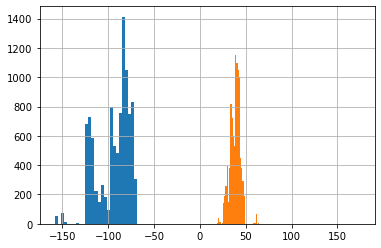

In [400]:
df['long'].hist(bins=100);df['lat'].hist(bins=100)

<AxesSubplot:>

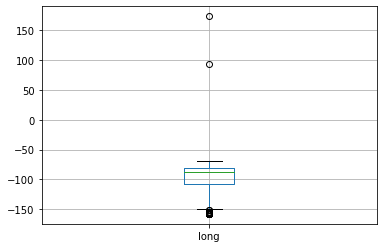

In [401]:
df.boxplot(column=['long'])

<AxesSubplot:>

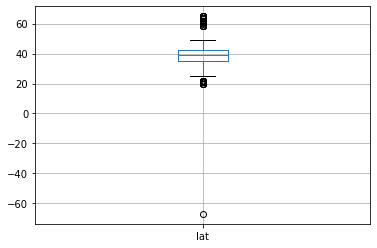

In [402]:
df.boxplot(column=['lat'])

In [403]:
df.long.describe()

count    9964.000000
mean      -94.021541
std        18.103900
min      -158.069300
25%      -108.572700
50%       -87.898500
75%       -80.690000
max       173.885502
Name: long, dtype: float64

In [404]:
df.lat.describe()

count    9964.000000
mean       38.585301
std         5.831709
min       -67.144243
25%        34.889751
50%        39.260000
75%        42.407625
max        64.947500
Name: lat, dtype: float64

In [405]:
df[df.long > 0]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
498,7308062122,https://anchorage.craigslist.org/cto/d/2020-8-...,anchorage / mat-su,https://anchorage.craigslist.org,100000,2020.0,chevrolet,corvette,gas,5,clean,automatic,https://images.craigslist.org/00G0G_5MpbX7bM2d...,Wow. Brand new 2020 c-8 corvette 5 miles. Bea...,ak,-67.144243,173.885502,2021-04-16T17:36:27-0800,high,2021-04-17 01:36:27+00:00
8739,7311040095,https://stcloud.craigslist.org/ctd/d/2004-infi...,st cloud,https://stcloud.craigslist.org,3499,2004.0,infiniti,g35 sedan,gas,185738,clean,automatic,https://images.craigslist.org/00e0e_an5Srs55ku...,2004 Infiniti G35 Sedan 4dr Sdn AWD Auto w/Lea...,mn,45.557900,94.163200,2021-04-22T15:34:44-0500,low,2021-04-22 20:34:44+00:00


In [406]:
df[df.lat < 0]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
498,7308062122,https://anchorage.craigslist.org/cto/d/2020-8-...,anchorage / mat-su,https://anchorage.craigslist.org,100000,2020.0,chevrolet,corvette,gas,5,clean,automatic,https://images.craigslist.org/00G0G_5MpbX7bM2d...,Wow. Brand new 2020 c-8 corvette 5 miles. Bea...,ak,-67.144243,173.885502,2021-04-16T17:36:27-0800,high,2021-04-17 01:36:27+00:00


In [407]:
# так удалю выбросы в гео

In [408]:
df = df[df.long < 0]

In [409]:
df = df[df.long > -140]

In [410]:
df = df[df.lat > 0]

In [411]:
df = df[df.lat < 55]

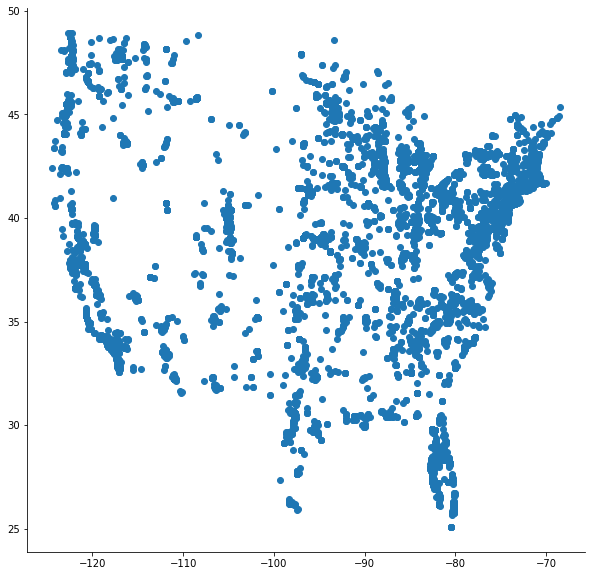

In [412]:
plt.figure(figsize=(10,10))
plt.scatter(df.long, df.lat)
sns.despine()
plt.show()

In [413]:
pd.DataFrame(data = [df.isna().sum()/df.shape[0]*100],
             index=["values Null (%)"]).T.style.background_gradient(cmap='summer_r')

,values Null (%)
id,0.000000
url,0.000000
region,0.000000
region_url,0.000000
price,0.000000
year,0.000000
manufacturer,0.000000
model,0.000000
fuel,0.000000
odometer,0.000000


### Data Visualisation

In [414]:
 def calculate_quantile(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    
    return boundaries

In [415]:
boundaries = calculate_quantile(df.price)
boundaries

(-22322.5, 58177.5)

In [416]:
is_outlier = (df.price < boundaries[0]) | (df.price > boundaries[1])
is_outlier.sum()

203

In [417]:
df_sort = df[is_outlier].sort_values('price')
df_sort

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
946,7312212565,https://lasvegas.craigslist.org/cto/d/fresno-d...,las vegas,https://lasvegas.craigslist.org,58500,2013.0,ram,3500 limited,diesel,57149,clean,automatic,https://images.craigslist.org/00o0o_6VEbwgYoL0...,Only 57K Miles! This 3500 RAM Truck has the 6....,nv,36.746400,-119.639700,2021-04-24T20:46:06-0700,high,2021-04-25 03:46:06+00:00
6060,7310551940,https://cincinnati.craigslist.org/ctd/d/camp-d...,cincinnati,https://cincinnati.craigslist.org,58500,2019.0,chevrolet,"silverado 2500hd 4wd crew cab 153.7"" ltz",other,50930,clean,automatic,https://images.craigslist.org/01010_ldls5xr3zz...,***Call Us for more information at: 513-453-41...,oh,39.171991,-84.271999,2021-04-21T17:05:31-0400,high,2021-04-21 21:05:31+00:00
4853,7308933629,https://omaha.craigslist.org/cto/d/cortland-20...,omaha / council bluffs,https://omaha.craigslist.org,58500,2008.0,chevrolet,corvette,gas,11000,clean,manual,https://images.craigslist.org/00P0P_kxzGxZwBY9...,2008 Corvette Z06 Wil Cooksey Edition Car nu...,ia,40.445488,-96.713695,2021-04-18T15:53:04-0500,high,2021-04-18 20:53:04+00:00
8163,7307146509,https://lubbock.craigslist.org/ctd/d/brownfiel...,lubbock,https://lubbock.craigslist.org,58600,2019.0,ford,f-150,gas,29458,clean,automatic,https://images.craigslist.org/00E0E_6JF7CBAVf7...,Stanley CDJR Brownfield address: 1706 Lubbo...,tx,33.196047,-102.273565,2021-04-15T08:58:48-0500,high,2021-04-15 13:58:48+00:00
6725,7313502600,https://harrisburg.craigslist.org/ctd/d/salem-...,harrisburg,https://harrisburg.craigslist.org,58670,2016.0,chevrolet,other,other,16407,clean,automatic,https://images.craigslist.org/00000_e7iiMwUVq3...,2016 *** Chevrolet Corvette 2LZ Z06*** ...,pa,44.927304,-123.030322,2021-04-27T15:56:06-0400,high,2021-04-27 19:56:06+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6121,7315323093,https://daytona.craigslist.org/ctd/d/orlando-2...,daytona beach,https://daytona.craigslist.org,197999,2015.0,other,Lamborghini Huracan,gas,33875,clean,other,https://images.craigslist.org/01717_55Ai9omMq5...,CREDIT AMNESTY! SE HABLA ESPANOL !!OPEN SUNDA...,fl,28.466088,-81.396429,2021-05-01T11:48:44-0400,high,2021-05-01 15:48:44+00:00
292,7310897583,https://tucson.craigslist.org/ctd/d/tucson-201...,tucson,https://tucson.craigslist.org,239995,2017.0,ferrari,488 gtb,gas,6012,clean,automatic,https://images.craigslist.org/00t0t_dN5Wr8nfOx...,2017 Ferrari 488 GTB Coupe2017 Ferrari 488 GTB...,az,32.236075,-110.878886,2021-04-22T09:38:59-0700,high,2021-04-22 16:38:59+00:00
5662,7313998757,https://winchester.craigslist.org/ctd/d/manass...,winchester,https://winchester.craigslist.org,304995,2021.0,porsche,911,gas,22,clean,automatic,https://images.craigslist.org/00r0r_gh2TnrNdSu...,2021 PORSCHE 911 Turbo Offered by: Insider...,va,38.762669,-77.461754,2021-04-28T15:49:25-0400,high,2021-04-28 19:49:25+00:00
9792,7305237859,https://delaware.craigslist.org/cto/d/delaware...,delaware,https://delaware.craigslist.org,1000000,2022.0,other,Any make any model,other,283466,clean,other,https://images.craigslist.org/00S0S_k3A68PVXRC...,We come to you and give you an easy quick tran...,de,39.572500,-75.595700,2021-04-11T13:51:42-0400,high,2021-04-11 17:51:42+00:00


In [418]:
df = df[(df.price > boundaries[0]) & (df.price < boundaries[1])]

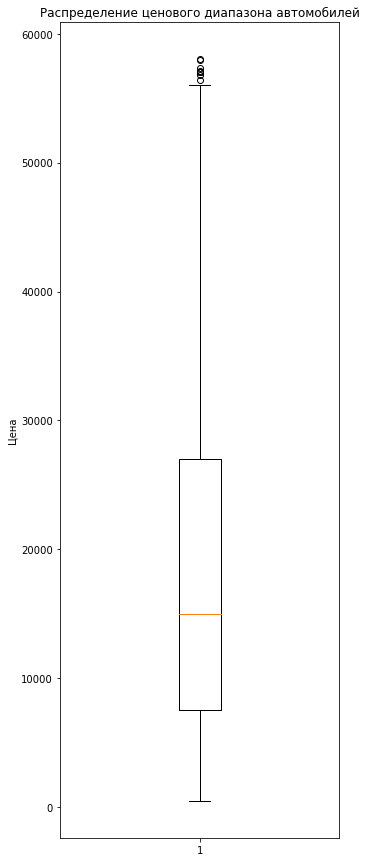

In [419]:
plt.figure(figsize=(5,15))
plt.boxplot(df.price)
plt.ylabel('Цена')
plt.title('Распределение ценового диапазона автомобилей');

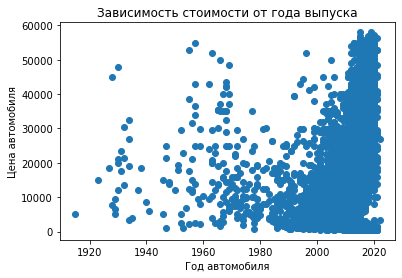

In [420]:
plt.figure()
plt.scatter(df['year'],df['price'])
plt.title("Зависимость стоимости от года выпуска")
plt.xlabel('Год автомобиля')
plt.ylabel('Цена автомобиля')
plt.show();

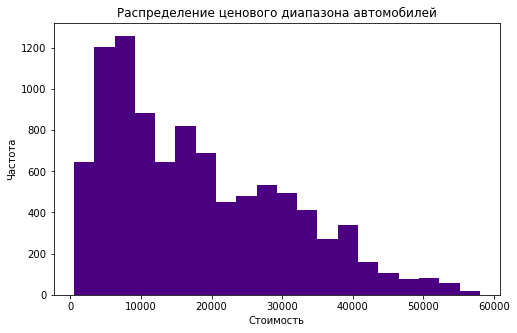

In [421]:
plt.figure(figsize=(8,5))
plt.hist(df.price, bins=20, color='indigo')
plt.xlabel('Стоимость')
plt.ylabel('Частота')
plt.title('Распределение ценового диапазона автомобилей');

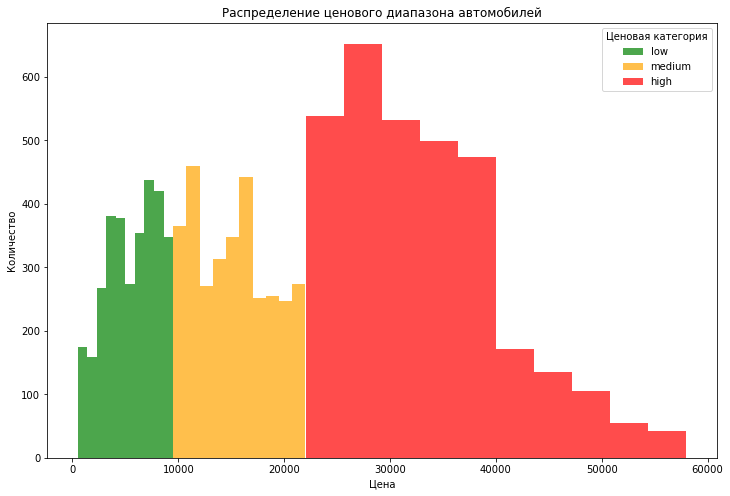

In [422]:
colors = {'low': 'green', 'medium': 'orange', 'high': 'red'}

fig, ax = plt.subplots(figsize=(12,8))
for price_category in colors:
    color = colors[price_category]
    data = df[df['price_category'] == price_category]
    
    ax.hist(data['price'], color=color, alpha=0.7)
    
ax.legend(colors, title='Ценовая категория')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.title('Распределение ценового диапазона автомобилей');
plt.show();

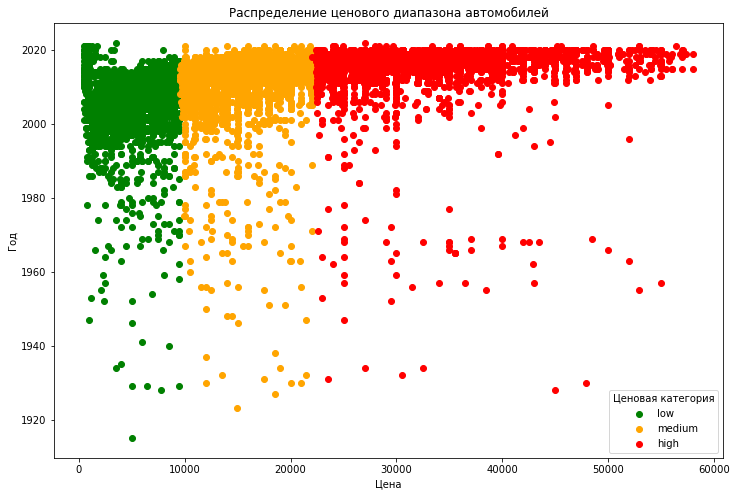

In [423]:
colors = {'low': 'green', 'medium': 'orange', 'high': 'red'}

fig, ax = plt.subplots(figsize=(12,8))
for price_category in colors:
    color = colors[price_category]
    data = df[df['price_category'] == price_category]
    ax.scatter(data['price'], data['year'], color=color, label=price_category)
    
ax.legend(loc='lower right', title='Ценовая категория')
plt.xlabel('Цена')
plt.ylabel('Год')
plt.title('Распределение ценового диапазона автомобилей');
plt.show();

In [424]:
manuf_count = df.groupby(['manufacturer']).size().reset_index(name='count')
manuf_count = manuf_count.rename(columns={'manufacturer': 'Manufacturer', 'count': 'Count'})
manuf_count

,Manufacturer,Count
0,acura,147
1,alfa-romeo,14
2,audi,190
3,bmw,323
4,buick,145
5,cadillac,180
6,chevrolet,1234
7,chrysler,159
8,datsun,2
9,dodge,316


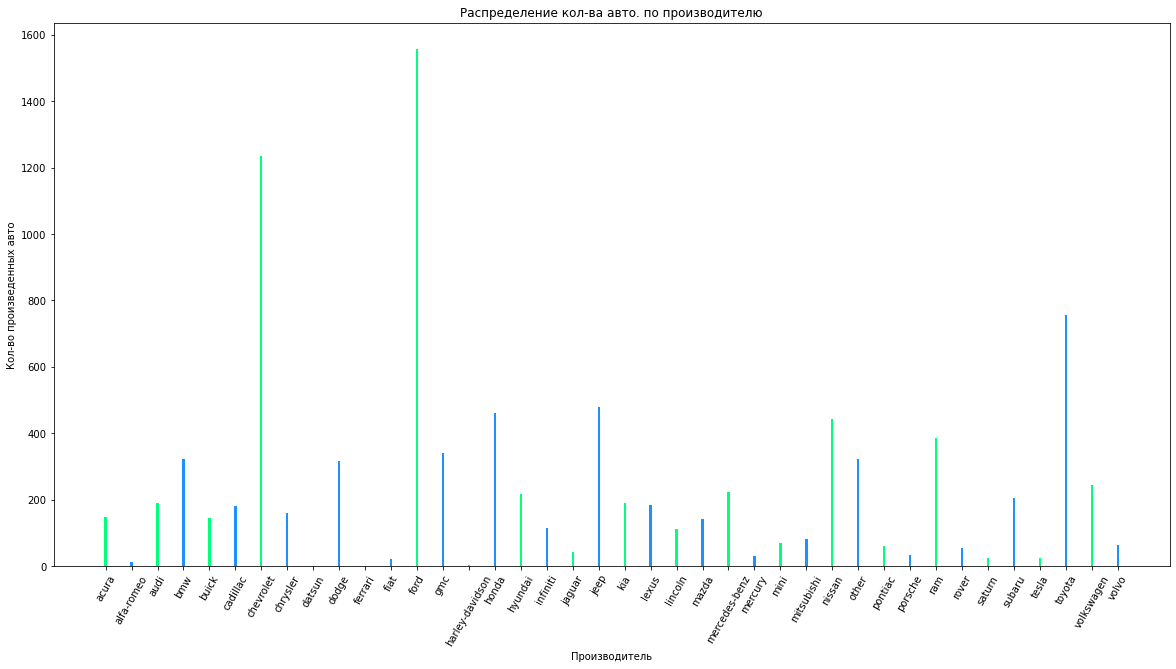

In [425]:
plt.figure(figsize=(20,10))
plt.bar(manuf_count['Manufacturer'], manuf_count['Count'], width=.09, color=['springgreen', 'dodgerblue'])
plt.xlabel('Производитель')
plt.xticks(rotation=60 ) #60 симпатичней
plt.ylabel('Кол-во произведенных авто')
plt.title('Распределение кол-ва авто. по производителю');
plt.show();

In [426]:
transmission_count = df.groupby(['transmission']).size().reset_index(name='count')
transmission_count = transmission_count.rename(columns={'transmission': 'Transmission', 'count': 'Count'})
transmission_count

,Transmission,Count
0,automatic,7365
1,manual,612
2,other,1641


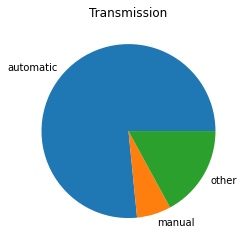

In [427]:
plt.pie(transmission_count['Count'], labels=transmission_count['Transmission'])
plt.title('Transmission')
plt.show();

## Feature Engineering

In [428]:
df.drop(columns = ['id'],axis = 1, inplace=True)

In [429]:
df['date'] = pd.to_datetime(df['date'])

In [430]:
 df['posting_date'] = pd.to_datetime(df['posting_date'])

In [431]:
# Добавил новые фичи год и месяц.
# Меня регулярно пандас просит делать через 'iloc',
# а когда делаю ему все ровно что то не нравиться 

In [432]:
df['year_date'] = df['date'].dt.year
df['month_date'] = df['date'].dt.month

<AxesSubplot:>

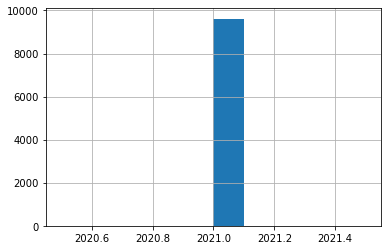

In [433]:
df.year_date.hist()

<AxesSubplot:>

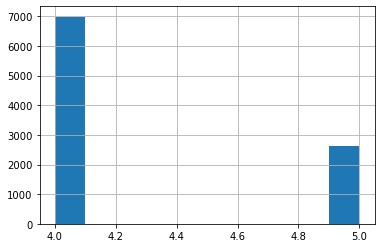

In [434]:
df.month_date.hist()

In [435]:
df.model.nunique()

3331

In [436]:
df['short_model'] = df.model.apply(lambda x: x.split(' ')[0])
df.short_model.nunique()

946

In [437]:
df.drop(columns = ['model'],axis = 1, inplace=True)

In [438]:
df.columns

Index(['url', 'region', 'region_url', 'price', 'year', 'manufacturer', 'fuel',
       'odometer', 'title_status', 'transmission', 'image_url', 'description',
       'state', 'lat', 'long', 'posting_date', 'price_category', 'date',
       'year_date', 'month_date', 'short_model'],
      dtype='object')

In [439]:
cat_list = ['short_model', 'transmission', 'region', 'manufacturer', 'state', 'title_status', 'fuel']

def foo_cat_nunique(spam):    
    for columns in spam:
        print(f'{columns}: {df[columns].nunique()}')
        
foo_cat_nunique(cat_list)

short_model: 946
transmission: 3
region: 389
manufacturer: 40
state: 50
title_status: 7
fuel: 5


In [440]:
data = df[['short_model', 'transmission', 'region', 'manufacturer', 'state', 'title_status', 'fuel']]
data.head(2)

,short_model,transmission,region,manufacturer,state,title_status,fuel
0,2500,other,chattanooga,ram,tn,clean,diesel
1,explorer,automatic,north jersey,ford,nj,clean,other


In [441]:
ohe = OneHotEncoder(sparse=False)
data = data.astype(str)
ohe.fit(data)

/home/h1gfun4/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(sparse=False, sparse_output=False)

In [442]:
ohe_new_data = ohe.transform(data)

In [443]:
ohe.get_feature_names_out()

array(['short_model_-benz', 'short_model_1', 'short_model_124', ...,
       'fuel_gas', 'fuel_hybrid', 'fuel_other'], dtype=object)

In [444]:
df[ohe.get_feature_names_out()] = ohe_new_data

/tmp/ipykernel_11144/2365737424.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names_out()] = ohe_new_data
/tmp/ipykernel_11144/2365737424.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names_out()] = ohe_new_data
/tmp/ipykernel_11144/2365737424.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragm

/tmp/ipykernel_11144/2365737424.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names_out()] = ohe_new_data
/tmp/ipykernel_11144/2365737424.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names_out()] = ohe_new_data
/tmp/ipykernel_11144/2365737424.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragm

/tmp/ipykernel_11144/2365737424.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names_out()] = ohe_new_data
/tmp/ipykernel_11144/2365737424.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names_out()] = ohe_new_data
/tmp/ipykernel_11144/2365737424.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragm

/tmp/ipykernel_11144/2365737424.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names_out()] = ohe_new_data
/tmp/ipykernel_11144/2365737424.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names_out()] = ohe_new_data
/tmp/ipykernel_11144/2365737424.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragm

In [445]:
df.head(2)

,url,region,region_url,price,year,manufacturer,fuel,odometer,title_status,transmission,...,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other
0,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,diesel,27442,clean,other,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,other,60023,clean,automatic,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [446]:
data_set.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'fuel', 'odometer', 'title_status', 'transmission',
       'image_url', 'description', 'state', 'lat', 'long', 'posting_date',
       'price_category', 'date'],
      dtype='object')

In [447]:
df.head(2)

,url,region,region_url,price,year,manufacturer,fuel,odometer,title_status,transmission,...,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other
0,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,diesel,27442,clean,other,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,other,60023,clean,automatic,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [448]:
data = df[['lat', 'long', 'year', 'price', 'odometer','month_date','year_date']]
data.head()

,lat,long,year,price,odometer,month_date,year_date
0,35.060000,-85.250000,2020.0,54990,27442,4,2021
1,40.821805,-74.061962,2016.0,16942,60023,5,2021
2,33.779214,-84.411811,2017.0,35590,14048,4,2021
3,35.715954,-78.655304,2013.0,14500,117291,4,2021
4,40.654800,-73.609700,2021.0,21800,8000,5,2021


In [449]:
std_scaler = StandardScaler()

In [450]:
std_scaler.fit(data)

StandardScaler()

In [451]:
std_scaled = std_scaler.transform(data)
std_scaled

array([[-0.66029979,  0.47178051,  0.95287228, ..., -1.0783295 ,
        -0.61332091,  0.        ],
       [ 0.45324658,  1.15296955,  0.53812252, ..., -0.55940536,
         1.6304678 ,  0.        ],
       [-0.90782892,  0.52281405,  0.64180996, ..., -1.29165843,
        -0.61332091,  0.        ],
       ...,
       [ 1.24641973, -1.82559619,  0.01968531, ...,  0.876607  ,
        -0.61332091,  0.        ],
       [ 0.87992476,  0.21923997,  0.43443507, ..., -0.52882514,
        -0.61332091,  0.        ],
       [-0.34914562,  1.01670553,  0.64180996, ..., -0.94328276,
        -0.61332091,  0.        ]])

In [452]:
data[['lat_std', 'long_std', 'year_std', 'price_std', 'odometer_std', 'month_date_std', 'year_date_std']] = std_scaled

/tmp/ipykernel_11144/1352460672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['lat_std', 'long_std', 'year_std', 'price_std', 'odometer_std', 'month_date_std', 'year_date_std']] = std_scaled
/tmp/ipykernel_11144/1352460672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['lat_std', 'long_std', 'year_std', 'price_std', 'odometer_std', 'month_date_std', 'year_date_std']] = std_scaled
/tmp/ipykernel_11144/1352460672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [453]:
data.head()

,lat,long,year,price,odometer,month_date,year_date,lat_std,long_std,year_std,price_std,odometer_std,month_date_std,year_date_std
0,35.060000,-85.250000,2020.0,54990,27442,4,2021,-0.660300,0.471781,0.952872,2.950401,-1.078329,-0.613321,0.0
1,40.821805,-74.061962,2016.0,16942,60023,5,2021,0.453247,1.152970,0.538123,-0.087901,-0.559405,1.630468,0.0
2,33.779214,-84.411811,2017.0,35590,14048,4,2021,-0.907829,0.522814,0.641810,1.401225,-1.291658,-0.613321,0.0
3,35.715954,-78.655304,2013.0,14500,117291,4,2021,-0.533528,0.873302,0.227060,-0.282906,0.352714,-0.613321,0.0
4,40.654800,-73.609700,2021.0,21800,8000,5,2021,0.420971,1.180506,1.056560,0.300032,-1.387986,1.630468,0.0


In [454]:
df[['lat_std', 'long_std', 'year_std', 'price_std', 'odometer_std', 'month_date_std', 'year_date_std']] = std_scaled

In [455]:
data = df[['lat', 'long']]
data.head()

,lat,long
0,35.060000,-85.250000
1,40.821805,-74.061962
2,33.779214,-84.411811
3,35.715954,-78.655304
4,40.654800,-73.609700


In [456]:
mm_scaler = MinMaxScaler()

In [457]:
mm_scaler.fit(data)

MinMaxScaler()

In [458]:
mm_scaled = mm_scaler.transform(data)

In [459]:
df[['lat_mm', 'long_mm']] = mm_scaled

In [460]:
data_geo = df[['lat', 'lat_std', 'lat_mm', 'long', 'long_std', 'long_mm']]
data_geo.head()

,lat,lat_std,lat_mm,long,long_std,long_mm
0,35.060000,-0.660300,0.418322,-85.250000,0.471781,0.699724
1,40.821805,0.453247,0.659835,-74.061962,1.152970,0.900383
2,33.779214,-0.907829,0.364637,-84.411811,0.522814,0.714757
3,35.715954,-0.533528,0.445817,-78.655304,0.873302,0.818001
4,40.654800,0.420971,0.652834,-73.609700,1.180506,0.908495


In [461]:
corr = data_geo.corr()
corr

,lat,lat_std,lat_mm,long,long_std,long_mm
lat,1.000000,1.000000,1.000000,-0.107611,-0.107611,-0.107611
lat_std,1.000000,1.000000,1.000000,-0.107611,-0.107611,-0.107611
lat_mm,1.000000,1.000000,1.000000,-0.107611,-0.107611,-0.107611
long,-0.107611,-0.107611,-0.107611,1.000000,1.000000,1.000000
long_std,-0.107611,-0.107611,-0.107611,1.000000,1.000000,1.000000
long_mm,-0.107611,-0.107611,-0.107611,1.000000,1.000000,1.000000


In [462]:
df.date = pd.to_datetime(df.date, errors='coerce')

In [463]:
df.drop(columns = ['url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'fuel', 'odometer', 'title_status', 'transmission', 'image_url', 'description',
        'state', 'lat', 'long', 'posting_date', 'lat_mm', 'long_mm','date','short_model','year_date','month_date'], axis = 1, inplace = True)

## Modeling

In [484]:
#

### DecisionTreeClassifier

In [465]:
df_prepared = df.copy()
df_prepared = df_prepared.drop(['price_std', 'odometer_std'], axis=1)

x = df_prepared.drop(['price_category'], axis=1)
y = df_prepared['price_category']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [466]:
# Обучаем модель дерева решений на тренировочной выборке
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [470]:
# Делаем предикт на тестовой выборке
predicted_test = clf.predict(x_test)

In [471]:
# Замеряем точность
accuracy_score(y_test, predicted_test)

0.7037422037422038

In [472]:
# Выводим матрицу ошибок
confusion_matrix(y_test, predicted_test)

array([[730,  45, 210],
       [ 38, 697, 215],
       [155, 192, 604]])

In [473]:
# Удалим фичи с нулевыми весам
clf.feature_importances_

array([0.        , 0.0002971 , 0.        , ..., 0.26923793, 0.00719729,
       0.        ])

In [474]:
f_im_list = list(zip(x_train.columns, clf.feature_importances_))
f_im_list

[('short_model_-benz', 0.0),
 ('short_model_1', 0.0002971029286881476),
 ('short_model_124', 0.0),
 ('short_model_128i', 0.0),
 ('short_model_135i', 0.0),
 ('short_model_1500', 0.0012821914728298708),
 ('short_model_163869', 0.0),
 ('short_model_1928', 0.0),
 ('short_model_1951', 0.0),
 ('short_model_1954', 0.0003772042084815207),
 ('short_model_1960s', 0.0),
 ('short_model_1966', 0.000408516526946203),
 ('short_model_1968', 0.0),
 ('short_model_1972', 0.0),
 ('short_model_1977', 0.0),
 ('short_model_1978', 0.0),
 ('short_model_198.5', 0.0),
 ('short_model_1988', 0.0),
 ('short_model_1994', 0.0),
 ('short_model_1999', 0.0003281287635217646),
 ('short_model_2', 0.0),
 ('short_model_200', 0.0008541958642366465),
 ('short_model_2000', 0.0),
 ('short_model_2002', 0.00021636843719680316),
 ('short_model_2006', 0.0),
 ('short_model_2007', 0.00040212424421893323),
 ('short_model_2008', 0.0),
 ('short_model_2009', 0.0),
 ('short_model_2012', 0.00033424079477416605),
 ('short_model_2015', 0.0),

In [475]:
f_im_list.sort(key = lambda x: x[1], reverse = True)

In [476]:
f_im_list

[('year_std', 0.2692379256407948),
 ('lat_std', 0.0587564342500415),
 ('long_std', 0.05249422288850761),
 ('fuel_diesel', 0.03448490206835465),
 ('transmission_other', 0.017145561910429666),
 ('short_model_silverado', 0.014506628978066958),
 ('manufacturer_kia', 0.009964000617335012),
 ('short_model_wrangler', 0.009883768171074985),
 ('manufacturer_volkswagen', 0.009080603641860634),
 ('manufacturer_hyundai', 0.008274804719474574),
 ('manufacturer_nissan', 0.007426350533928211),
 ('month_date_std', 0.007197292966051614),
 ('manufacturer_ram', 0.006037950099458006),
 ('manufacturer_mercedes-benz', 0.005936070333837743),
 ('short_model_focus', 0.005846749178366974),
 ('manufacturer_ford', 0.005825468801701941),
 ('short_model_escape', 0.0053531721968338615),
 ('short_model_tacoma', 0.005010520674113249),
 ('manufacturer_gmc', 0.004932837749870625),
 ('manufacturer_chevrolet', 0.004770438649595426),
 ('title_status_clean', 0.004750934759860852),
 ('manufacturer_honda', 0.00449826986111392

In [477]:
for i in f_im_list:
    if i[1] == 0.0:
        if i[0] in df_prepared:
            df_prepared = df_prepared.drop([i[0]], axis=1)

In [478]:
# Заново обучить модель и измерить качество 
df_prepared.head()

,price_category,short_model_1,short_model_1500,short_model_1954,short_model_1966,short_model_1999,short_model_200,short_model_2002,short_model_2007,short_model_2012,...,title_status_salvage,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,lat_std,long_std,year_std,month_date_std
0,high,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,-0.660300,0.471781,0.952872,-0.613321
1,medium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.453247,1.152970,0.538123,1.630468
2,high,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.907829,0.522814,0.641810,-0.613321
3,medium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.533528,0.873302,0.227060,-0.613321
4,medium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.420971,1.180506,1.056560,1.630468


In [479]:
x = df_prepared.drop(['price_category'], axis=1)
y = df_prepared['price_category']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [480]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [481]:
predicted_test = clf.predict(x_test)

In [482]:
accuracy_score(y_test, predicted_test)

0.6968121968121969

In [483]:
confusion_matrix(y_test, predicted_test)

array([[728,  49, 208],
       [ 45, 681, 224],
       [165, 184, 602]])

### RandomForestClassifier

In [487]:
# Обучаем модель случайного леса
rf_clf = RandomForestClassifier(random_state=50)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(random_state=50)

In [488]:
# Делаем предикт
predicted_test = rf_clf.predict(x_test)

In [489]:
# Считаем точность модели
accuracy_score(y_test, predicted_test)

0.7442827442827443

In [490]:
# Делаем матрицу ошибок 
confusion_matrix(y_test, predicted_test)

array([[789,  42, 154],
       [ 29, 766, 155],
       [160, 198, 593]])

In [492]:
# Тюнинг параметров
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 50,
 'verbose': 0,
 'warm_start': False}

In [493]:
rf_clf2 = RandomForestClassifier(random_state=100)
rf_clf2.fit(x_train, y_train)

RandomForestClassifier(random_state=100)

In [494]:
predicted_test = rf_clf2.predict(x_test)

In [495]:
accuracy_score(y_test, predicted_test)

0.7453222453222453